https://twitter.com/__mharrison__/status/1641092957225857027/photo/1

In [43]:
import pandas as pd
import numpy as np
df = pd.read_csv("./Data.csv")
df.head()

,Date,Country,Summary,Status,Total Collected,Coupon
0,Feb-20-2023,USA,A,Good,1,UPSELL
1,Feb-21-2023,USA,B,Good,2,LINK
2,Mar-19-2023,USA,C,Good,3,BIFF
3,Mar-20-2023,USA,D,Good,4,BIFF
4,Mar-19-2023,USA,C,Good,3,TWEET


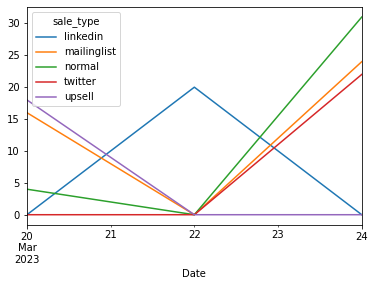

In [44]:
# The graphic will make no sense. I made up data so I could work this example.
df=(df
.loc[:,['Date','Country','Summary','Status','Total Collected','Coupon']]
.assign(Date=pd.to_datetime(df.Date),
        sale_type=np.select(
        [df.Coupon.str.contains('UPSELL',na=False),
         df.Coupon.str.contains('LINK',na=False),
         df.Coupon.str.contains('TWEET',na=False),
         df.Coupon.str.contains('BOOST',na=False)],
        ['upsell','linkedin','twitter','mailinglist'],
        default='normal'       
        )      
       )
.groupby([pd.Grouper(key='Date',freq='2D'),'sale_type'])
.sum(numeric_only=True)['Total Collected']
.unstack() # This is similar to unpivot
.fillna(0)
.loc['Mar-20-2023':]
.plot()
)
None